In [1]:
import os
import time

import numpy as np
import pandas as pd
from mlxtend.data import mnist_data
from sklearn.metrics import confusion_matrix
import math

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
X,y = mnist_data()

In [3]:
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('1st row', X[0])

Dimensions: 5000 x 784
1st row [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0. 

In [4]:
print('Classes: Setosa, Versicolor, Virginica')
print(np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Classes: Setosa, Versicolor, Virginica
[0 1 2 3 4 5 6 7 8 9]
Class distribution: [500 500 500 500 500 500 500 500 500 500]


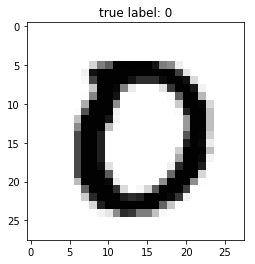

In [5]:
%matplotlib inline
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 45)      

## train_test_split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)

In [7]:
print(y.shape)
X_train.shape

(5000,)


(4000, 784)

## Adaboost

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier
Adaclf = AdaBoostClassifier(n_estimators= 47, learning_rate= 0.2, algorithm= 'SAMME.R')
Adaclf.fit(X_train, y_train)
pre = Adaclf.predict(X_test)
(pre == y_test).mean()

0.696

In [10]:
cm = confusion_matrix(pre,y_test)
cm

array([[69,  0,  1,  1,  0,  2,  2,  0,  0,  0],
       [ 0, 99,  4,  0,  0,  0,  4,  0,  3,  1],
       [ 2,  3, 67,  3,  1,  2, 20,  1,  1,  5],
       [ 2,  2,  3, 62,  2, 22,  0,  0, 13,  6],
       [ 0,  0,  0,  0, 40,  4,  1,  2,  0,  5],
       [ 7,  0,  3, 16,  4, 70,  9,  0,  3,  1],
       [ 0,  0,  3,  0,  1,  0, 60,  0,  0,  0],
       [ 3,  1,  2,  2,  2,  0,  0, 72,  0,  5],
       [ 2,  3, 17,  5,  3,  3,  5,  0, 78,  4],
       [ 0,  0,  0,  4, 47,  3,  2, 22,  4, 79]], dtype=int64)

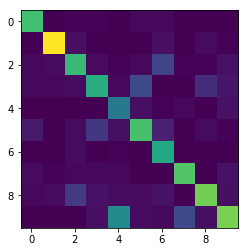

In [11]:
plt.imshow(cm)

plt.savefig('adaboot_heatmap.png', dpi = 400)

In [ ]:
plt.imsave(fname= 'adacm',arr = cm)

In [ ]:
plt.savefig(fname = 'adacm')

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(cm)

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(estimator=AdaBoostClassifier(random_state=123),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

In [ ]:
cv_acc

In [ ]:
print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

**Random search and Grid search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Ada = AdaBoostClassifier()

para_random = {'algorithm':['SAMME','SAMME.R'],
                'n_estimators':list(np.arange(30,70)),
                'learning_rate':[0.2,0.4,0.6,0.8,1]                
               }

rs = RandomizedSearchCV(estimator=Ada,
                        param_distributions=para_random,
                        n_iter=20,
                        iid=False,
                        n_jobs=-1,
                        refit=True,
                        cv=10)

rs.fit(X_train, y_train)

In [ ]:
print('Best Accuracy: %.2f%%' % (rs.best_score_*100))
print('Best Params:', rs.best_params_)
print('Accuracy: %.2f%%' % (rs.best_estimator_.score(X_test, y_test)*100))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Dtc = DecisionTreeClassifier(random_state = 1, max_features = 'log2',class_weight = 'balanced')

Ada = AdaBoostClassifier(base_estimator = Dtc)


param_grid = [{'algorithm':['SAMME','SAMME.R'],
               'n_estimators':list(np.arange(40,60)),
               'base_estimator__criterion' : ['gini','entropy'],
               'base_estimator__splitter' : ['best','random']}]

gs = GridSearchCV(estimator = Ada,param_grid = param_grid,
                  refit = True)


In [ ]:
gs.fit(X_train,y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)
print('Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

## GBM

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(loss = 'huber')

In [10]:
GBM.fit(X_train, y_train)
pre = GBM.predict(X_test)
(np.round(pre) == y_test).mean()

0.334

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(n_estimators=100)
GBM.fit(X = X_train, y = y_train)
pre = GBM.predict(X_test)
(pre == y_test).mean()

0.914

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(n_estimators=150)
GBM.fit(X = X_train, y = y_train)
pre = GBM.predict(X_test)
(pre == y_test).mean()

0.924

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(n_estimators=200,learning_rate=0.2)
GBM.fit(X = X_train, y = y_train)
pre = GBM.predict(X_test)
(pre == y_test).mean()

0.932

In [27]:
cm = confusion_matrix(pre,y_test)
cm

array([[ 82,   0,   1,   0,   0,   0,   2,   0,   0,   0],
       [  0, 107,   0,   0,   0,   0,   0,   0,   2,   1],
       [  0,   0,  95,   4,   0,   1,   0,   0,   2,   1],
       [  1,   0,   1,  83,   0,   2,   0,   0,   5,   3],
       [  0,   1,   1,   1,  94,   3,   0,   1,   1,   2],
       [  0,   0,   0,   3,   1,  97,   3,   0,   1,   1],
       [  0,   0,   1,   0,   2,   0,  96,   0,   0,   0],
       [  1,   0,   0,   1,   0,   0,   0,  92,   0,   1],
       [  1,   0,   1,   1,   2,   0,   2,   0,  90,   1],
       [  0,   0,   0,   0,   1,   3,   0,   4,   1,  96]], dtype=int64)

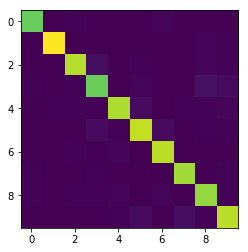

In [29]:
plt.imshow(cm)

plt.savefig('GBM_heatmap.png', dpi = 400)

In [ ]:
pre = GBM.predict(X_test)
(pre == y_test).mean()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(estimator=GradientBoostingRegressor(loss = 'huber'),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

In [ ]:
cv_acc

#### search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = [{'n_estimators': list(np.arange(40,110)),
               'learning_rate': [0.1,0.2]}]

gs = GridSearchCV(estimator=GradientBoostingClassifier(random_state=123),
                  param_grid=param_grid,
                  iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=5)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

Gra = GradientBoostingClassifier()

para_random = {'n_estimators':list(np.arange(40,110)),
                'learning_rate':[0.2,0.4,0.6,0.8,1]                
               }

rs = RandomizedSearchCV(estimator=Gra,
                        param_distributions=para_random,
                        n_iter=3,
                        iid=False,
                        n_jobs=-1,
                        refit=True,
                        cv=5)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid=False, n_iter=3, n_jobs=-1,
          param_distributions={'n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_tra

In [21]:
print('Best Accuracy: %.2f%%' % (rs.best_score_*100))
print('Best Params:', rs.best_params_)
print('Accuracy: %.2f%%' % (rs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 91.25%
Best Params: {'n_estimators': 86, 'learning_rate': 0.2}
Accuracy: 91.40%


## XGboost

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pre = xgb.predict(X_test)
acc = np.mean(pre == y_test)
acc

0.92

In [32]:
xgb = XGBClassifier(n_estimators=150,learning_rate=0.2)
xgb.fit(X_train,y_train)
pre = xgb.predict(X_test)
acc = np.mean(pre == y_test)
acc

0.945

In [33]:
xgb = XGBClassifier(n_estimators=200,learning_rate=0.25)
xgb.fit(X_train,y_train)
pre = xgb.predict(X_test)
acc = np.mean(pre == y_test)
acc

0.949

In [34]:
xgb = XGBClassifier(n_estimators=250,learning_rate=0.3)
xgb.fit(X_train,y_train)
pre = xgb.predict(X_test)
acc = np.mean(pre == y_test)
acc

0.947

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pre,y_test)
cm

array([[ 82,   0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0, 107,   1,   0,   0,   0,   0,   0,   2,   1],
       [  0,   0,  93,   3,   0,   1,   0,   0,   3,   0],
       [  1,   0,   1,  85,   0,   3,   0,   0,   1,   2],
       [  0,   0,   1,   1,  95,   1,   0,   2,   1,   1],
       [  0,   0,   1,   2,   0,  99,   0,   0,   0,   1],
       [  0,   0,   0,   0,   2,   1, 101,   0,   0,   0],
       [  1,   1,   1,   2,   0,   0,   0,  92,   0,   1],
       [  1,   0,   1,   0,   1,   0,   1,   0,  94,   1],
       [  0,   0,   0,   0,   2,   1,   0,   3,   1,  99]], dtype=int64)

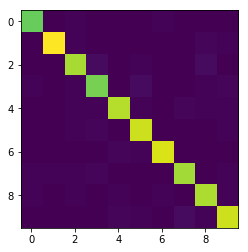

In [46]:
plt.imshow(cm)
plt.savefig('XGBoost_heatmap.png',dpi = 500)

<Figure size 432x288 with 0 Axes>

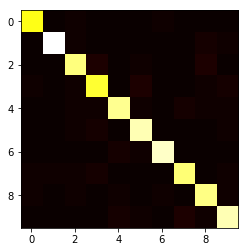

In [36]:
plt.imshow(cm,cmap = 'hot', interpolation='nearest')

In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(estimator=XGBClassifier(),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

In [ ]:
cv_acc